<a id="TOP"> </a>
<div class="alert alert-block alert-info">
</div>

***
# FINAL REPORT


# Zillow Tri-County ML for Tax Assesed Values - 2017
___

![California with FIPS](https://raw.githubusercontent.com/David-Howell/zillow-tricounty-2017/main/california_fips_codes.png "California with FIPS")
<a id="INDEX"></a>

## Lets begin by getting our imports and grabing the clean data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wrangle_mvp import clean_zillow
from wrangle_mvp import boxplots, hists, split_data_continuous, model_sets
from wrangle_mvp import get_models, heatmaps
import seaborn as sns

import plotly.express as px

from scipy.stats import pearsonr, spearmanr

df = clean_zillow()

Number of observations removed: 5516


## Now we'll split our data to keep out of training data separate

In [2]:
train, validate, test = split_data_continuous(df, with_baseline=True)

Prepared df: (35848, 4)

Train: (21508, 4)
Validate: (7170, 4)
Test: (7170, 4)
The mean_preds had the lowest RMSE: 215859 with an in/out of: 0.999


## We'll take a look at boxplots of our data:
- It look like even after cleaning and removing outliers there are still a number of them on the top side of Area.
- Additionally, the Baseline scale could be improved to match up with the Tax Value scale.
  - This will be done in a future iteration.

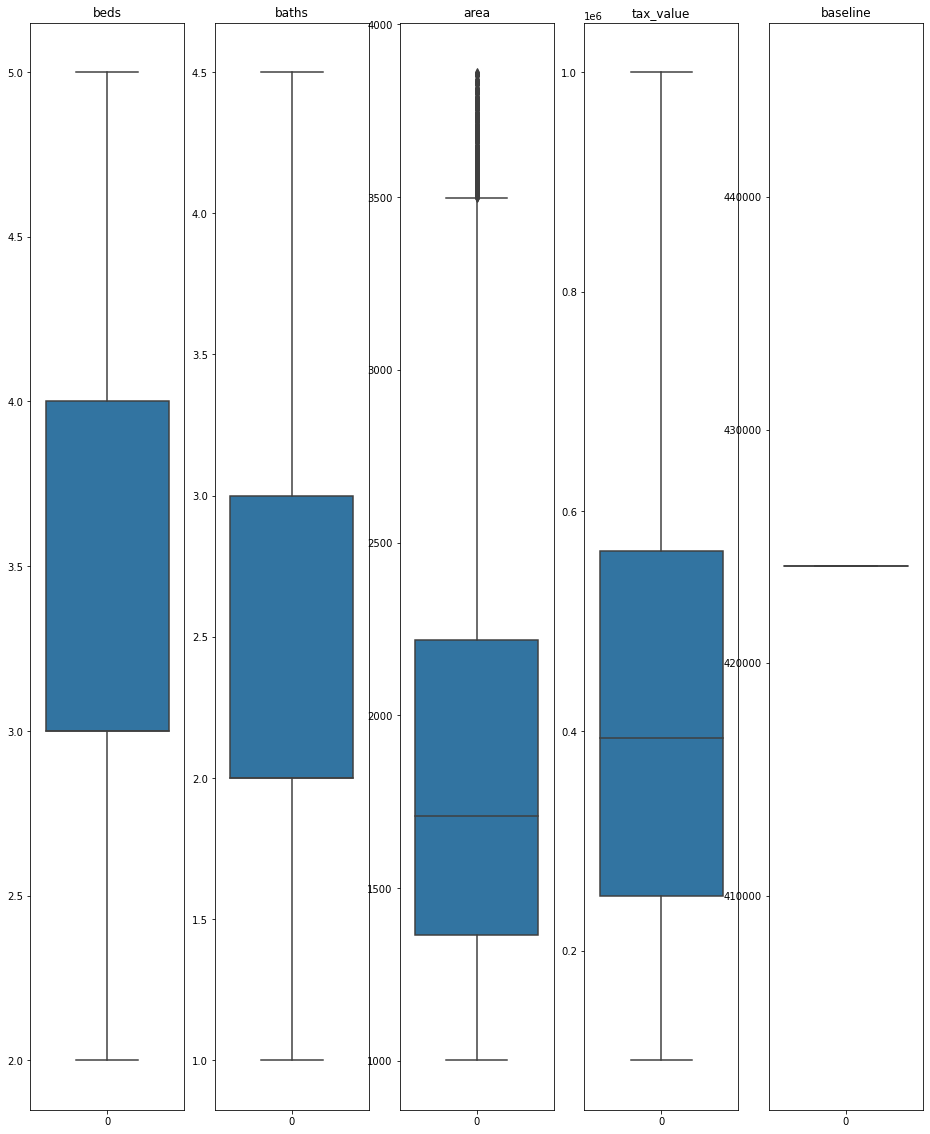

In [3]:
boxplots(train)

## Our hitograms show us that the data is very skewed and <u>Not</u> Normal

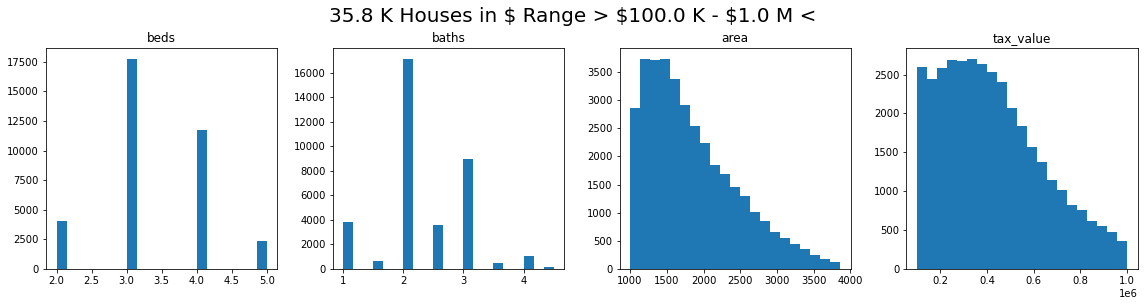

In [4]:
hists(df, granularity=21)

## Looking at a heatmap of the correlation of our data shows some, but very low correlation with the target variable.

- We will run tests to find out more about that

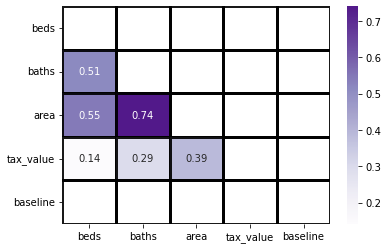

In [4]:
heatmaps(train)

<a id="TOP"> </a>
<div class="alert alert-block alert-info">
</div>

***

## Q: Is there a relationship between number of Bedrooms and Tax value?

## Hypothesis

### - ${H_0}$: There is no linear correlation between number of Bedrooms and Tax Value
### - ${H_a}$: There is a linear correlation between number of Bedrooms and Tax Value

### Test Hypothesis

In [5]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p_value = spearmanr(train.beds, train.tax_value)

print(f'Correlation Coefficient by Spearman Test: {r}\np-value: {p_value}')

# set alpha : 0.05
if p_value < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

Correlation Coefficient by Spearman Test: 0.13396033900853327
p-value: 1.1020137436135083e-86
We can reject the null hypothesis


<div class="alert alert-block alert-info">
</div>

***

## Q: Is there a relationship between number of Bathrooms and Tax value?

## Hypothesis

### - ${H_0}$: There is no linear correlation between number of Bathrooms and Tax Value
### - ${H_a}$: There is a linear correlation between number of Bathrooms and Tax Value

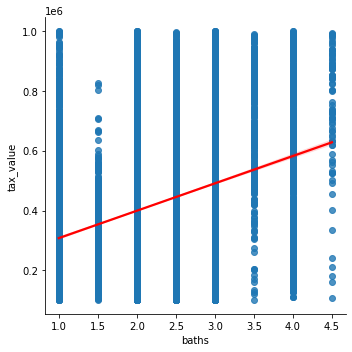

In [8]:
sns.lmplot(data=train, x='baths', y= 'tax_value', line_kws={'color':'red'})
plt.show()

### Test Hypothesis

In [9]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p_value = spearmanr(train.baths, train.tax_value)

print(f'Correlation Coefficient by Spearman Test: {r}\np-value: {p_value}')

# set alpha : 0.05
if p_value < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

Correlation Coefficient by Spearman Test: 0.28052191116331116
p-value: 0.0
We can reject the null hypothesis


<div class="alert alert-block alert-info">
</div>

***

## Q: Is there a relationship between Area and Tax value?

## Hypothesis

### - ${H_0}$: There is no linear correlation between Area and Tax Value

### - ${H_a}$: There is a linear correlation between Area and Tax Value

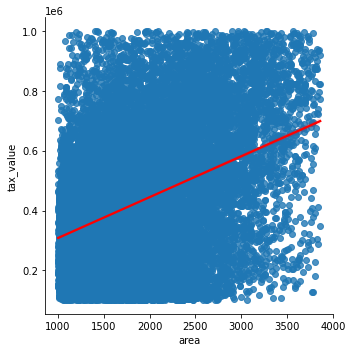

In [11]:
sns.lmplot(data=train, x='area', y= 'tax_value', line_kws={'color':'red'})
plt.show()

In [12]:
### Test Hypothesis

In [13]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p_value = spearmanr(train.area, train.tax_value)

print(f'Correlation Coefficient by Spearman Test: {r}\np-value: {p_value}')

# set alpha : 0.05
if p_value < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

Correlation Coefficient by Spearman Test: 0.3384438057695835
p-value: 0.0
We can reject the null hypothesis


### It seems that there is a correlation between all of the variables we have for features. However, as seen in the heatmap, the statistical testing, and the individual plots the amount of correlation is hardly enough for us to make any realistic infrence from these.

### We will have to see if there's much of a decrease in error from the baseline predictions...

### Is there enough correlation between the independent variables and the target varibable to make use of a regression model with just this data?

<br><br>
<a id="test_summary"> </a>
<div class="alert alert-block alert-info">
</div>

***

# Summary:

1. Q: Is there a relationship between number of Bedrooms and Tax value?
  - Hypotheses:
    - ${H_0}$: ~~There is no linear correlation between number of Bedrooms and Tax Value~~
    - ${H_a}$: There is a linear correlation between number of Bedrooms and Tax Value

2. Q: Is there a relationship between number of Bathrooms and Tax value?
  - Hypotheses:
    - ${H_0}$: ~~There is no linear correlation between number of Bathrooms and Tax Value~~
    - ${H_a}$: There is a linear correlation between number of Bathrooms and Tax Value

3. Q: Is there a relationship between Area and Tax value?
  - Hypotheses:
    - ${H_0}$: ~~There is no linear correlation between Area and Tax Value~~
    - ${H_a}$: There is a linear correlation between Area and Tax Value

#### Heatmap Takeaways

- Although all of the beds baths and are seem to be postively correlated, none of them is to a high degree, as such, this data alone isn't likely to yield very positive results.
- Based on my correlation coefficient and my p-value, **I reject my Null hypothesis that there is no correlation between `beds` and `tax_value`.**
- Looking at the correlation between our independent variables, they also have higher positive correlations with each other, multicollinearity. This informs me that I don't want to use all of them together in a linear regression model.

<div class="alert alert-block alert-info">
</div>

***
# Modeling:

### We will use our get_models function to make, train, and evaluate our models

In [14]:
zillow, models, metric_df = get_models()

Number of observations removed: 5516
Prepared df: (35848, 4)

Train: (21508, 4)
Validate: (7170, 4)
Test: (7170, 4)
The mean_preds had the lowest RMSE: 215859 with an in/out of: 0.999

X_cols = ['beds', 'baths', 'area']

y_cols = ['tax_value', 'baseline']




In [66]:
X_cols = ['beds', 'baths', 'area']

y_cols = ['tax_value', 'baseline']

In [15]:
models

,model_name,made_model,fit_model,predict_model
0,Linear Regression,LinearRegression(normalize=True),LinearRegression(normalize=True),<bound method LinearModel.predict of LinearReg...
1,Lasso Lars,"LassoLars(alpha=1, random_state=123)","LassoLars(alpha=1, random_state=123)",<bound method LinearModel.predict of LassoLars...
2,GLM (Tweedie Reg),"TweedieRegressor(alpha=0, power=1)","TweedieRegressor(alpha=0, power=1)",<bound method GeneralizedLinearRegressor.predi...


In [16]:
metric_df

,model,rmse_train,r^2,rmse_validate,r^2_validate
0,baseline,$215.9 K,-2.220446e-16,$216.1 K,0.000000
0,Linear Regression,$198.0 K,1.588614e-01,$200.4 K,0.140048
0,Lasso Lars,$198.0 K,1.588591e-01,$200.4 K,0.140093
0,GLM (Tweedie Reg),$198.0 K,1.582753e-01,$200.5 K,0.139376


In [18]:
zillow_dict = {'df': zillow[0],
               'X_train': zillow[1],
               'y_train': zillow[2],
               'X_validate': zillow[3],
               'y_validate': zillow[4],
               'X_test': zillow[5],
               'y_test': zillow[6]
              }

In [19]:
for i in zillow_dict:
    print(f"{i} = zillow_dict['{i}']")

df = zillow_dict['df']
X_train = zillow_dict['X_train']
y_train = zillow_dict['y_train']
X_validate = zillow_dict['X_validate']
y_validate = zillow_dict['y_validate']
X_test = zillow_dict['X_test']
y_test = zillow_dict['y_test']


In [20]:
df = zillow_dict['df']
X_train = zillow_dict['X_train']
y_train = zillow_dict['y_train']
X_validate = zillow_dict['X_validate']
y_validate = zillow_dict['y_validate']
X_test = zillow_dict['X_test']
y_test = zillow_dict['y_test']

### Evaluate

**Plotting Actual vs. Predicted Values**

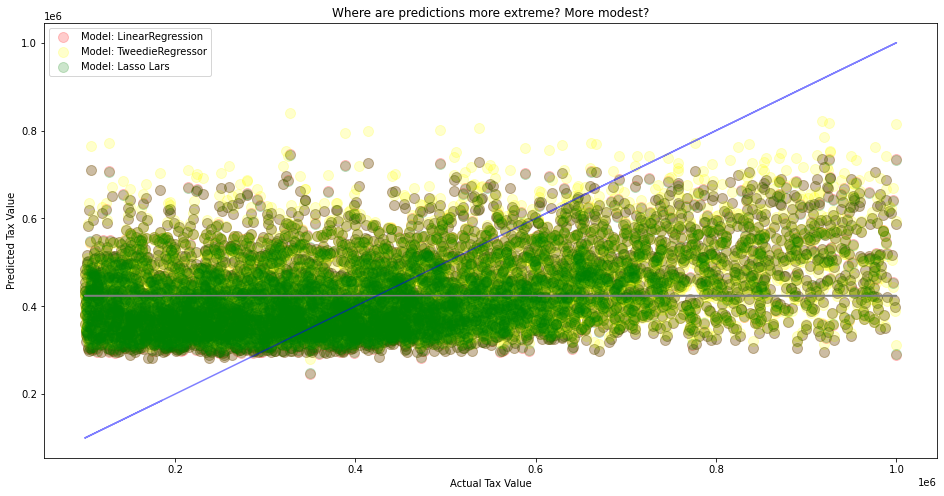

In [22]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.baseline, alpha=1, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate['Linear Regression'], 
            alpha=.2, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate['GLM (Tweedie Reg)'], 
            alpha=.2, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate['Lasso Lars'], 
            alpha=.2, color="green", s=100, label="Model: Lasso Lars")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.title("Where are predictions more extreme? More modest?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

**Residual Plots: Plotting the Errors in Predictions**

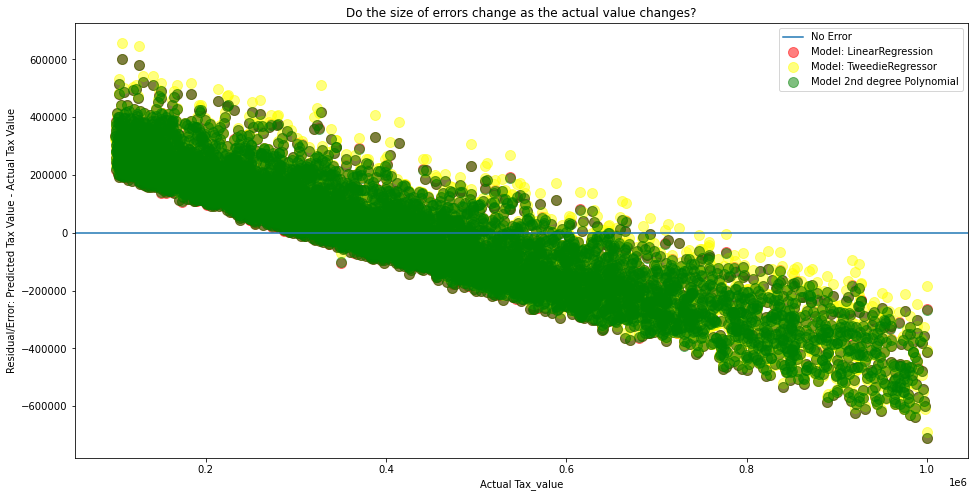

In [23]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.tax_value, y_validate['Linear Regression'] - y_validate.tax_value, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate['GLM (Tweedie Reg)'] - y_validate.tax_value, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate['Lasso Lars'] - y_validate.tax_value, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax_value")
plt.ylabel("Residual/Error: Predicted Tax Value - Actual Tax Value")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

**Histograms**

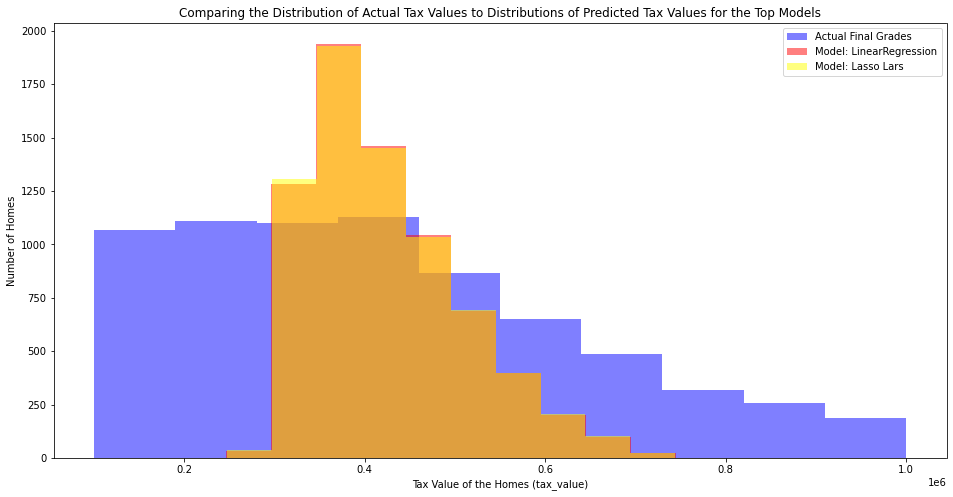

In [24]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.tax_value, color='blue', alpha=.5, label="Actual Final Grades")
plt.hist(y_validate['Linear Regression'], color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate['Lasso Lars'], color='yellow', alpha=.5, label="Model: Lasso Lars")
# plt.hist(y_validate['GLM (Tweedie Reg)'], color='green', alpha=.5, label="Model TweedieRegressor")
plt.xlabel("Tax Value of the Homes (tax_value)")
plt.ylabel("Number of Homes")
plt.title("Comparing the Distribution of Actual Tax Values to Distributions of Predicted Tax Values for the Top Models")
plt.legend()
plt.show()

# Conclusion:
- From evaluating the models it seems clear that the data doesn't give a lot of meaningful information for predicting the Tax Value.
- Suggestions are to gather more data to make a better model
- Despite these drawbacks, our best models do perform better than baseline.